# Hausaufgabe 6
> *Abgabe bis 08.12.2023 um 23:59*

### Aufgabe 1 *(20 Punkte)*

**a)** Vor der Digitalisierung wird ein Tiefpassfilter auf ein Signal angewendet, welcher Frequenzen filtert, die höher als die halbe Abtastfrequenz sind.
Erläutert kurz, welchen Sinn dieses Vorgehen hat. Nennt dabei den Namen der entsprechenden Gesetzmäßigkeit und den des Effekts, der dadurch verhindert wird. (1-2 Sätze)

**b)** Ihr möchtet eine Telefonverbindung vom U-Bahn-Eingang des Ernst-Reuters-Platzes herstellen, doch leider ist der Empfang sehr schlecht. Wie könnt ihr mithilfe der Fourier-Transformation das übertragene Sprachsignal verändern, um Bandbreite zu sparen aber dennoch verstanden zu werden? (1-4 Sätze)

a: verhindert falsche Tonwiedergabe durch Aliasing. Um Aliasing zu verhindert, darf fmax nicht mehr als die hälfte der Abtastfrequenz sein.

b:

### Aufgabe 2 🎅 *(80 Punkte)*
Damit der Weihnachtsmann beim Verteilen der Geschenke sich nicht die Strecke merken muss, kommuniziert er mit seinen Elfen, wo er als nächstes hin muss. Der Weihnachtsmann benutzt dafür den XM-AS Kanal auf dem Frequenzband 0,9 - 1,1 kHz. Damit andere Leute, die auch den gleichen Kanal benutzen, den Weihnachtsmann nicht so einfach abhören können, benutzt der Weihnachtsmann eine besondere Morse-artige Kodierung: Weihnachtsmann-Morse-Kodierung (WMK). Ihr konntet ein Audio-Abbild des Kanals aufgreifen. Allerdings hört man auch die anderen Leute auf anderen Frequenzen morsen.

Nachdem ihr herausgefunden habt, wo der Weihnachtsmann als nächstes landet, schicken ihm eine Nachricht, dass er doch bitte noch extra Schokoladen mitbringen soll.

In [16]:
# TODO: 
import numpy as np
from scipy.fft import fft, fftfreq, ifft
from scipy.io import wavfile
import matplotlib.pyplot as plt




#### a) Signal filtern *(25 Punkte)*
Filtert das Kummunikationssignal des Weihnachtsmannes aus der Audiodatei heraus, so dass man nurnoch den Weihnachtsmann-Morse-Code hört. Schreibt das Signal in eine separate Audiodatei.

In [17]:
# TODO
rate, data = wavfile.read("xm-as.wav")
data = data/np.max(data)
Fourier = fft(data)
frequencies = fftfreq(len(data),(1/rate))
#print(fftfreq(data,(1/rate)))
Fourier[(frequencies <= 900) | (frequencies >= 1100)] = 0
#print(Fourier[(frequencies <= 900) | (frequencies >= 1100)].real)
inversefft = ifft(Fourier).real

wavfile.write("Filtered.wav",41000,inversefft)




#help(fft)

#### b) Dekodierung *(15 Punkte)*
Dekodiert mithilfe der unten stehende Tabelle die Nachricht des Weihnachtsmannes und gebt das nächstes Ziel des Weihnachtsmannes mit der ``print`` Funktion aus.

*Das Dekodieren könnt ihr einfach per Hand durchführen*

nächster halt: hauptgebäude tu


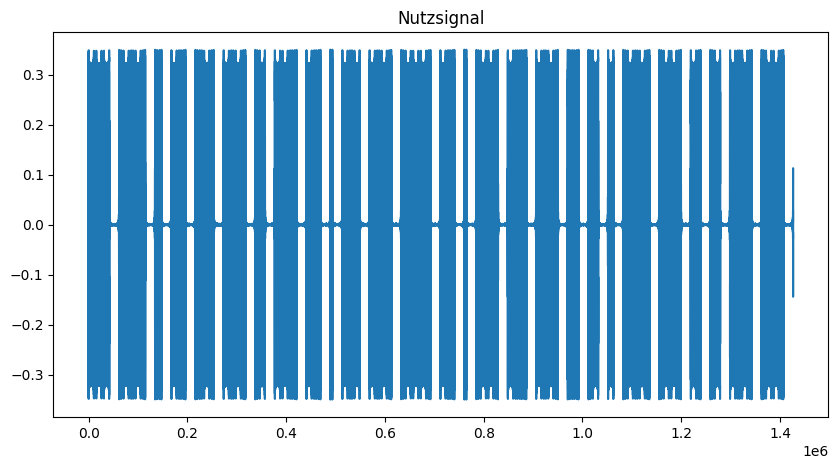

In [18]:
# TODO
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,len(data),data.shape[0]), inversefft)
plt.title("Nutzsignal")

print("nächster halt: hauptgebäude tu") 
#(spaces waren nicht enthalten)

#### c) WMK-Generator *(25 Punkte)*
Vervollständigt die Funktion ``text2wmk`` zur Generierung der WMK zu einem übergebenen Text. Die Kodierung macht keine Unterschied zwischen Groß- und Kleinschreibung, Leerzeichen werden ignoriert. Zeichen, die nicht in der Tabelle vorkommen, werden ebenfalls ignoriert.

*Tipp: Vielleicht helfen euch Python Dictionaries*

In [42]:
def text2wmk(text):

    wmk_dict = {
        "a": ".", "m": ".__", "y": "._._", "6": ".__..",
        "b": "_", "n": "___"  , "z": "__._" , "7": "___..",
        "c": "..", "o": "...." , ".": "..__" , "8": "..._.",
        "d": "_.", "p": "_..." , "!": "_.__" , "9": "_.._.",
        "e": "._", "q": "._.." , "?": ".___" , "ä": "._._.",
        "f": "__", "r": "__.." , "-": "____" , "ü": "__._.",
        "g": "..."  , "s": ".._." , "0": ".....", "ö": "..__.",
        "h": "_.."  , "t": "_._." , "1": "_....", ",": "_.__.",
        "i": "._."  , "u": ".__." , "2": "._...", ":": ".___.",
        "j": "__."  , "v": "___." , "3": "__...", ";": "____.",
        "k": ".._"  , "w": "..._" , "4": ".._..",
        "l": "_._"  , "x": "_.._" , "5": "_._.."}
    

    return "".join([wmk_dict[i] for  i in text.lower().replace(" ","")])


#### d) Kodieren *(15 Punkte)*
Benutzt die ``text2wmk`` Funktion, um den Weihnachtsmann mittels WMK den Bedarf an Schokolade mitzuteilen. gebt dazu den Orignaltext und den WMK-Text auf der Konsole aus.

In [44]:
w_nachricht = "Hallo Weihnachtsmann, wir benötigen ganz dringend noch viel mehr Schokooo"
print(f"Original: {w_nachricht}")
print(f"WMK-Kodierung: {text2wmk(w_nachricht)}")

Original: Hallo Weihnachtsmann, wir benötigen ganz dringend noch viel mehr Schokooo
WMK-Kodierung: _..._.__._......._._._._..___..._.._._..._..__._______.__...._._.__.._.____..__._._.._.....____...._____.__.__..._.___...._____.___......_..___.._..__._.__.__..__...._..._........_............


### Weihnachtsmann.Morse-Kodierung (WMK)
Die WMK ähnelt sich der Morsekodierung in der Hinsicht, dass bei der WMK auch kurze und lange Töne verwendet werden. Zwischen den Tönen ist eine kruze Pause; die Pause zwischen zwei Zeichen ist hörbar größer. Kurze Töne werden mit einem Punkt ``.`` und lange Töne mit einem Unterstrich ``_`` dargestellt. 

| Zeichen | Darstellung | Zeichen | Darstellung | Zeichen | Darstellung | Zeichen | Darstellung |
|---------|-------------|---------|-------------|---------|-------------|---------|-------------|
| a       | ``.``       | m       | ``.__``     | y       | ``._._``    | 6       | ``.__..``   |
| b       | ``_``       | n       | ``___``     | z       | ``__._``    | 7       | ``___..``   |
| c       | ``..``      | o       | ``....``    | .       | ``..__``    | 8       | ``..._.``   |
| d       | ``_.``      | p       | ``_...``    | !       | ``_.__``    | 9       | ``_.._.``   |
| e       | ``._``      | q       | ``._..``    | ?       | ``.___``    | ä       | ``._._.``   |
| f       | ``__``      | r       | ``__..``    | -       | ``____``    | ü       | ``__._.``   |
| g       | ``...``     | s       | ``.._.``    | 0       | ``.....``   | ö       | ``..__.``   |
| h       | ``_..``     | t       | ``_._.``    | 1       | ``_....``   | ,       | ``_.__.``   |
| i       | ``._.``     | u       | ``.__.``    | 2       | ``._...``   | :       | ``.___.``   |
| j       | ``__.``     | v       | ``___.``    | 3       | ``__...``   | ;       | ``____.``   |
| k       | ``.._``     | w       | ``..._``    | 4       | ``.._..``   |         |             |
| l       | ``_._``     | x       | ``_.._``    | 5       | ``_._..``   |         |             |

Nach jedem Zeichen wird eine Pause eingefügt. Diese wird mit dem Pipe-Symbol ``|`` dargestellt. Die WMK-Darstellung vom Text ``Hallo Welt!`` sieht folgendermaßen aus:

``_..|.|_._|_._|....|..._|._|_._|_._.|_.__|``

#### e) Extra: Zurückfunken *(Unbewertet: 0 Punkte)*
Verwendet die Funktion ``wkm2sound`` aus der Datei ``helper.py`` um ausn ihrem WKM-Text eine Sounddatei zu generieren.

In [21]:
import helper


TypeError: wkm2sound() missing 1 required positional argument: 'morse_text'

#### f) Extra: Wer funkt da noch? *(Unbewertet: 0 Punkte)*
Findet herruas, wer sonst noch dem Kanal Nachrichten sendet.

*Tipp: Nur der Weihnachtsmann benutzt die WMK, die anderen benutzen normale Morsekodierung.*